# **BUSINESS CASE**

## Définir la Problématique

L'entreprise fictive VOLT MOTION INNOVATIONS, spécialisée dans la commercialisation de véhicules électriques, cherche à se doter d'un outil de suivi de ses ventes accessible via un navigateur web.

Cet outil est principalement destiné aux équipes de vente pour optimiser leurs prises de décision.

Grâce à des menus déroulants, les membres de ces équipes pourront filtrer les informations pertinentes par :
- Région
- Année
- Type de véhicules

Les dirigeants de VOLT MOTION INNOVATIONS souhaitent obtenir une analyse des KPIs suivants :
- Nombre d'unités dans le monde, par année, et par type de bornes de recharge
- Taux d'évolution du nombre d'unités dans le monde, par année, et par type de bornes de recharge
- Nombre de ventes par région, par année, et par type de véhicules
- Taux d'évolution du nombre de ventes par région, par année, et par type de véhicules
- Prédictions du nombre de ventes par région, pour l’année en cours, et par type de véhicules

La présentation de l'application et des résultats de l'analyse des KPIs se déroulera le 30 août 2024 (délai de 48h), en binôme.

*Notes additionnelles concernant les abbréviations utilisées :*
- *BEV : Véhicule Electrique à Batterie (Battery Electric Vehicle)*
- *PHEV : Véhicule Electrique Hybride Rechargeable (Plug-in Hybrid Electric Vehicle)*
- *FCEV : Véhicule Electrique à Pile à Combustible (Fuel Cell Electric Vehicle)*

## Préparer les Outils

In [1]:
# Importer des librairies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
# Définir des fonctions
def check_directory():
    """
    Fonction : Vérifier l'environnement de travail et son contenu
    Résultat : Affichage d'informations concernant l'environnement de travail et son contenu
    """
    try:
        current_directory = os.getcwd()
        print("CURRENT DIRECTORY")
        print()
        print(current_directory)
        print()
        print()
        print("FILES IN CURRENT DIRECTORY")
        print()
        files = os.listdir(current_directory)
        if files:
            for file in files:
                print(file)
            print()
            print()
        else:
            print("Files not found")
            print()
            print()
            
    except Exception as e:
        print(f"Error message: {e}")
        print()
        print()


def check_dataframe(dataframe):
    """
    Fonction : Vérifier un dataframe
    Résultat : Affichage d'informations concernant le dataframe
    """
    try:
        print("INFORMATIONS GENERALES")
        print()
        print(dataframe.info())
        print()
        print()
        print("PREMIERES LIGNES")
        print()
        print(dataframe.head())
        print()
        print()
        print("DERNIERES LIGNES")
        print()
        print(dataframe.tail())
        print()
        print()
        print("LIGNES DUPLIQUEES")
        print()
        print(f"Il y a {dataframe.duplicated().sum()} lignes dupliquées.")
        print()
        print()
        print("VALEURS MANQUANTES PAR COLONNE")
        print()
        print(dataframe.isna().sum().reset_index(name = "missing_values_count").rename(columns = {"index": "column_name"}))
        print()
        print()
        print("VALEURS UNIQUES PAR COLONNE")
        print()
        print(dataframe.nunique().reset_index(name = "unique_values_count").rename(columns = {"index": "column_name"}))
        print()
        print()
        try:
            numeric_dataframe = dataframe.select_dtypes(include = "number")
            if not numeric_dataframe.empty:
                print("STATISTIQUES DES COLONNES NUMERIQUES")
                print()
                print(numeric_dataframe.describe())
                print()
                print()
            else:
                None
                
        except Exception as e:
            print(f"Error message: {e}")
            print()
            
    except Exception as e:
            print(f"Error message: {e}")


def check_unique_values(dataframe):
    """
    Fonction : Vérifier un dataframe concernant des véhicules électriques
    Résultat : Affichage d'informations concernant un dataframe concernant des véhicules électriques
    """
    try:
        print("REGIONS")
        print()
        print(dataframe["region"].unique())
        print()
        print()
        print("CATEGORIES")
        print()
        print(dataframe["category"].unique())
        print()
        print()
        print("PARAMETERS")
        print()
        print(dataframe["parameter"].unique())
        print()
        print()
        print("MODES")
        print()
        print(dataframe["mode"].unique())
        print()
        print()
        print("POWERTRAINS")
        print()
        print(dataframe["powertrain"].unique())
        print()
        print()
        print("YEARS")
        print()
        print(dataframe["year"].unique())
        print()
        print()
        print("UNITS")
        print()
        print(dataframe["unit"].unique())
        print()
        
    except Exception as e:
        print(f"Error fetching data: {e}")


def calculate_charging_points_kpis(dataframe):
    """
    Fonction : Calculer des KPIs (nombre de ventes et taux d'évolution) concernant les bornes de recharge par année
    Résultat: Un dictionnaire concernant des KPIs (nombre de ventes et taux d'évolution) concernant les bornes de recharge par année
    """
    kpis_dict = {}    
    years = dataframe["year"].unique()
    for year in years:
        try:
            charging_points_number = dataframe.loc[
                (dataframe["unit"] == "charging points") & (dataframe["year"] == year)
            ]
            charging_points_total_number = int(charging_points_number["value"].sum())
            
            fast_charging_points_number = int(charging_points_number.loc[
                charging_points_number["powertrain"] == "Publicly available fast", "value"
            ].sum())
            slow_charging_points_number = int(charging_points_number.loc[
                charging_points_number["powertrain"] == "Publicly available slow", "value"
            ].sum())

            previous_year = year - 1
            charging_points_number_previous_year = dataframe.loc[
                (dataframe["unit"] == "charging points") & (dataframe["year"] == previous_year)
            ]
            charging_points_total_number_previous_year = int(charging_points_number_previous_year["value"].sum())

            if charging_points_total_number_previous_year > 0:
                evolution_rate = round((
                    ((charging_points_total_number - charging_points_total_number_previous_year) / charging_points_total_number_previous_year) * 100
                ), 2)
                
            else:
                evolution_rate = float("inf")
            
            kpis_dict[year] = {
                "total_charging_points": charging_points_total_number,
                "fast_charging_points": fast_charging_points_number,
                "slow_charging_points": slow_charging_points_number,
                "evolution_rate": evolution_rate
            }
        
        except Exception as e:
            print(f"Error message: {e}")

    return kpis_dict


def calculate_vehicles_kpis(dataframe, vehicle):
    """
    Fonction : Calculer des KPIs (nombre de ventes et taux d'évolution) concernant les véhicules électriques par année
    Résultat: Un dictionnaire concernant des KPIs (nombre de ventes et taux d'évolution) concernant les véhicules électriques par année
    """
    vehicles_kpis_dict = {}
    years = dataframe["year"].unique()
        
    for year in years:
        try:
            vehicle_sales_count = dataframe.loc[
                (dataframe["mode"] == vehicle) & 
                (dataframe["year"] == year) & 
                (dataframe["parameter"] == "EV sales")
            ]
            vehicle_total_sales_count = int(vehicle_sales_count["value"].sum())
    
            sales_count_for_BEV = int(vehicle_sales_count.loc[
                vehicle_sales_count["powertrain"] == "BEV", "value"
            ].sum())
                
            sales_count_for_PHEV = int(vehicle_sales_count.loc[
                vehicle_sales_count["powertrain"] == "PHEV", "value"
            ].sum())
                
            sales_count_for_FCEV = int(vehicle_sales_count.loc[
                vehicle_sales_count["powertrain"] == "FCEV", "value"
            ].sum())                    

            previous_year = year - 1
            vehicle_sales_count_previous_year = dataframe.loc[
                (dataframe["mode"] == vehicle) & 
                (dataframe["year"] == previous_year) & 
                (dataframe["parameter"] == "EV sales")
            ]
            vehicle_total_sales_count_previous_year = int(vehicle_sales_count_previous_year["value"].sum())

            if vehicle_total_sales_count_previous_year > 0:
                evolution_rate_total = round((
                    ((vehicle_total_sales_count - vehicle_total_sales_count_previous_year) / vehicle_total_sales_count_previous_year) * 100
                ), 2)
                
            else:
                evolution_rate_total = float("inf")

            previous_year_BEV_sales = int(vehicle_sales_count_previous_year.loc[
                vehicle_sales_count_previous_year["powertrain"] == "BEV", "value"
            ].sum())
            
            if previous_year_BEV_sales > 0:
                evolution_rate_BEV = round((
                    ((sales_count_for_BEV - previous_year_BEV_sales) / previous_year_BEV_sales) * 100
                ), 2)
                
            else:
                evolution_rate_BEV = float("inf")

            previous_year_PHEV_sales = int(vehicle_sales_count_previous_year.loc[
                vehicle_sales_count_previous_year["powertrain"] == "PHEV", "value"
            ].sum())
            
            if previous_year_PHEV_sales > 0:
                evolution_rate_PHEV = round((
                    ((sales_count_for_PHEV - previous_year_PHEV_sales) / previous_year_PHEV_sales) * 100
                ), 2)
            else:
                evolution_rate_PHEV = float("inf")

            previous_year_FCEV_sales = int(vehicle_sales_count_previous_year.loc[
                vehicle_sales_count_previous_year["powertrain"] == "FCEV", "value"
            ].sum())
            
            if previous_year_FCEV_sales > 0:
                evolution_rate_FCEV = round((
                    ((sales_count_for_FCEV - previous_year_FCEV_sales) / previous_year_FCEV_sales) * 100
                ), 2)
            else:
                evolution_rate_FCEV = float("inf")

            vehicles_kpis_dict[(vehicle, year)] = {
                "total_sales_count": vehicle_total_sales_count,
                "BEV_sales_count": sales_count_for_BEV,
                "PHEV_sales_count": sales_count_for_PHEV,
                "FCEV_sales_count": sales_count_for_FCEV,
                "evolution_rate_total": evolution_rate_total,
                "evolution_rate_BEV": evolution_rate_BEV,
                "evolution_rate_PHEV": evolution_rate_PHEV,
                "evolution_rate_FCEV": evolution_rate_FCEV
            }

        except Exception as e:
            print(f"Error processing {vehicle} in {year}: {e}")
            vehicles_kpis_dict[(vehicle, year)] = None

    return vehicles_kpis_dict


def train_and_predict(years_array, sales_counts, label):
    """
    Fonction : Entrainer un modèle de prédiction concernant le nombre de ventes pour l'année 2024
    Résultat: Un dictionnaire concernant la prédiction du nombre de ventes pour l'année 2024
    """
    polynomial_features = PolynomialFeatures(degree = 2)
    model = make_pipeline(polynomial_features, LinearRegression())
    model.fit(years_array, sales_counts)
    
    year_to_predict = np.array([[2024]])
    predicted_sales_count = model.predict(year_to_predict)
    
    return {label: predicted_sales_count[0]}

In [3]:
# Appeler la fonction check_directory() pour vérifier l'environnement de travail
check_directory()

CURRENT DIRECTORY

C:\Users\willi\data_resources\portfolio\business_case


FILES IN CURRENT DIRECTORY

.ipynb_checkpoints
business_case.ipynb
business_case_logo.png
business_case_streamlit.py
IEA_EV_dataEV_charging_pointsHistoricalEV.csv
IEA_EV_dataEV_salesHistoricalCars.csv
IEA_EV_dataEV_stockHistoricalBuses.csv
IEA_EV_dataEV_stockHistoricalTrucks.csv
IEA_EV_dataEV_stockHistoricalVans.csv




## Collecter les Données

In [4]:
# Stocker dans des variables les chemins d'accès des fichiers contenant les données
charging_points_file_path = r"C:\Users\willi\data_resources/portfolio/business_case/IEA_EV_dataEV_charging_pointsHistoricalEV.csv"
car_sales_file_path = r"C:\Users\willi\data_resources/portfolio/business_case/IEA_EV_dataEV_salesHistoricalCars.csv"
bus_sales_file_path = r"C:\Users\willi\data_resources/portfolio/business_case/IEA_EV_dataEV_stockHistoricalBuses.csv"
truck_sales_file_path = r"C:\Users\willi\data_resources/portfolio/business_case/IEA_EV_dataEV_stockHistoricalTrucks.csv"
van_sales_file_path = r"C:\Users\willi\data_resources/portfolio/business_case/IEA_EV_dataEV_stockHistoricalVans.csv"

In [5]:
# Lire les fichiers et Stocker leurs données dans des dataframes 
charging_points_df = pd.read_csv(charging_points_file_path)
car_sales_df = pd.read_csv(car_sales_file_path)
bus_sales_df = pd.read_csv(bus_sales_file_path)
truck_sales_df = pd.read_csv(truck_sales_file_path)
van_sales_df = pd.read_csv(van_sales_file_path)

### Vérifier les dataframes

#### Concernant les Bornes de recharge

In [6]:
# Appeler la fonction check_dataframe() 
# pour afficher des informations concernant le dataframe
check_dataframe(charging_points_df)

INFORMATIONS GENERALES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      750 non-null    object 
 1   category    750 non-null    object 
 2   parameter   750 non-null    object 
 3   mode        750 non-null    object 
 4   powertrain  750 non-null    object 
 5   year        750 non-null    int64  
 6   unit        750 non-null    object 
 7   value       750 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 47.0+ KB
None


PREMIERES LIGNES

      region    category           parameter mode               powertrain  \
0  Australia  Historical  EV charging points   EV  Publicly available fast   
1  Australia  Historical  EV charging points   EV  Publicly available slow   
2  Australia  Historical  EV charging points   EV  Publicly available fast   
3  Australia  Historical  EV charging points   EV  Publicly av

In [7]:
# Appeler la fonction check_electric_vehicle_dataframe() 
# pour afficher des informations supplémentaires concernant le dataframe
check_unique_values(charging_points_df)

REGIONS

['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Africa'
 'Spain' 'Sweden' 'Switzerland' 'Thailand' 'Turkiye' 'United Kingdom'
 'USA' 'World']


CATEGORIES

['Historical']


PARAMETERS

['EV charging points']


MODES

['EV']


POWERTRAINS

['Publicly available fast' 'Publicly available slow']


YEARS

[2017 2018 2019 2020 2021 2022 2023 2011 2012 2013 2014 2015 2016 2010]


UNITS

['charging points']



#### Concernant les Voitures

In [8]:
# Appeler la fonction check_dataframe() 
# pour afficher des informations concernant le dataframe
check_dataframe(car_sales_df)

INFORMATIONS GENERALES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB
None


PREMIERES LIGNES

      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV sales share  Cars         EV  2011   percent   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011

In [9]:
# Appeler la fonction check_electric_vehicle_dataframe() 
# pour afficher des informations supplémentaires concernant le dataframe
check_unique_values(car_sales_df)

REGIONS

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea'
 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania' 'Seychelles'
 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Turkiye' 'United Arab Emirates' 'United Kingdom' 'USA' 'World']


CATEGORIES

['Historical']


PARAMETERS

['EV sales share' 'EV stock share' 'EV sales' 'EV stock'
 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


MODES

['Cars']


POWERTRAINS

['EV' 'BEV' 'PHEV' 'FCEV']


YEARS

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2010]


UNITS

['percent' 'Vehicles' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']



#### Concernant les Bus

In [10]:
# Appeler la fonction check_dataframe() 
# pour afficher des informations concernant le dataframe
check_dataframe(bus_sales_df)

INFORMATIONS GENERALES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1815 non-null   object 
 1   category    1815 non-null   object 
 2   parameter   1815 non-null   object 
 3   mode        1815 non-null   object 
 4   powertrain  1815 non-null   object 
 5   year        1815 non-null   int64  
 6   unit        1815 non-null   object 
 7   value       1815 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 113.6+ KB
None


PREMIERES LIGNES

    region    category       parameter   mode powertrain  year      unit  \
0  Belgium  Historical        EV stock  Buses        BEV  2010  Vehicles   
1  Belgium  Historical  EV stock share  Buses         EV  2010   percent   
2  Belgium  Historical  EV stock share  Buses         EV  2011   percent   
3  Belgium  Historical        EV stock  Buses        BEV  2011  Veh

In [11]:
# Appeler la fonction check_electric_vehicle_dataframe() 
# pour afficher des informations supplémentaires concernant le dataframe
check_unique_values(bus_sales_df)

REGIONS

['Belgium' 'Brazil' 'Canada' 'China' 'Denmark' 'EU27' 'Europe' 'Finland'
 'France' 'Germany' 'India' 'Israel' 'Italy' 'Japan' 'Korea' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Spain'
 'Sweden' 'Switzerland' 'United Kingdom' 'USA' 'World']


CATEGORIES

['Historical']


PARAMETERS

['EV stock' 'EV stock share' 'EV sales' 'EV sales share'
 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


MODES

['Buses']


POWERTRAINS

['BEV' 'EV' 'PHEV' 'FCEV']


YEARS

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


UNITS

['Vehicles' 'percent' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']



#### Concernant les Camions

In [12]:
# Appeler la fonction check_dataframe() 
# pour afficher des informations concernant le dataframe
check_dataframe(truck_sales_df)

INFORMATIONS GENERALES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1028 non-null   object 
 1   category    1028 non-null   object 
 2   parameter   1028 non-null   object 
 3   mode        1028 non-null   object 
 4   powertrain  1028 non-null   object 
 5   year        1028 non-null   int64  
 6   unit        1028 non-null   object 
 7   value       1028 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 64.4+ KB
None


PREMIERES LIGNES

    region    category       parameter    mode powertrain  year      unit  \
0  Belgium  Historical        EV stock  Trucks        BEV  2010  Vehicles   
1  Belgium  Historical  EV stock share  Trucks         EV  2010   percent   
2  Belgium  Historical  EV stock share  Trucks         EV  2011   percent   
3  Belgium  Historical        EV stock  Trucks        BEV  2011 

In [13]:
# Appeler la fonction check_electric_vehicle_dataframe() 
# pour afficher des informations supplémentaires concernant le dataframe
check_unique_values(truck_sales_df)

REGIONS

['Belgium' 'Brazil' 'Canada' 'China' 'Denmark' 'EU27' 'Europe' 'Finland'
 'France' 'Germany' 'Japan' 'Netherlands' 'Norway' 'Rest of the world'
 'Spain' 'Sweden' 'Switzerland' 'United Kingdom' 'World']


CATEGORIES

['Historical']


PARAMETERS

['EV stock' 'EV stock share' 'EV sales share' 'EV sales'
 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


MODES

['Trucks']


POWERTRAINS

['BEV' 'EV' 'PHEV' 'FCEV']


YEARS

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


UNITS

['Vehicles' 'percent' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']



#### Concernant les Utilitaires

In [14]:
# Appeler la fonction check_dataframe() 
# pour afficher des informations concernant le dataframe
check_dataframe(van_sales_df)

INFORMATIONS GENERALES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1783 non-null   object 
 1   category    1783 non-null   object 
 2   parameter   1783 non-null   object 
 3   mode        1783 non-null   object 
 4   powertrain  1783 non-null   object 
 5   year        1783 non-null   int64  
 6   unit        1783 non-null   object 
 7   value       1783 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 111.6+ KB
None


PREMIERES LIGNES

    region    category       parameter  mode powertrain  year      unit  \
0  Belgium  Historical        EV sales  Vans        BEV  2010  Vehicles   
1  Belgium  Historical        EV stock  Vans        BEV  2010  Vehicles   
2  Belgium  Historical  EV sales share  Vans         EV  2010   percent   
3  Belgium  Historical  EV stock share  Vans         EV  2010   percent

In [15]:
# Appeler la fonction check_electric_vehicle_dataframe() 
# pour afficher des informations supplémentaires concernant le dataframe
check_unique_values(van_sales_df)

REGIONS

['Belgium' 'Brazil' 'Canada' 'China' 'Denmark' 'EU27' 'Europe' 'Finland'
 'France' 'Germany' 'India' 'Israel' 'Italy' 'Japan' 'Korea' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Spain'
 'Sweden' 'Switzerland' 'United Kingdom' 'World']


CATEGORIES

['Historical']


PARAMETERS

['EV sales' 'EV stock' 'EV sales share' 'EV stock share'
 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


MODES

['Vans']


POWERTRAINS

['BEV' 'EV' 'PHEV' 'FCEV']


YEARS

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


UNITS

['Vehicles' 'percent' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']



## Nettoyer et Préparer les Données

### Concaténer les dataframes

In [16]:
# Concaténer les dataframes et Appeler la fonction check_dataframe() 
# pour afficher des informations concernant le dataframe
electric_vehicles_df = pd.concat([charging_points_df, car_sales_df, bus_sales_df, truck_sales_df, van_sales_df])
check_dataframe(electric_vehicles_df)

INFORMATIONS GENERALES

<class 'pandas.core.frame.DataFrame'>
Index: 9174 entries, 0 to 1782
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9174 non-null   object 
 1   category    9174 non-null   object 
 2   parameter   9174 non-null   object 
 3   mode        9174 non-null   object 
 4   powertrain  9174 non-null   object 
 5   year        9174 non-null   int64  
 6   unit        9174 non-null   object 
 7   value       9174 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 645.0+ KB
None


PREMIERES LIGNES

      region    category           parameter mode               powertrain  \
0  Australia  Historical  EV charging points   EV  Publicly available fast   
1  Australia  Historical  EV charging points   EV  Publicly available slow   
2  Australia  Historical  EV charging points   EV  Publicly available fast   
3  Australia  Historical  EV charging points   EV  Publicly avai

In [17]:
# Appeler la fonction check_electric_vehicle_dataframe() 
# pour afficher des informations supplémentaires concernant le dataframe
check_unique_values(electric_vehicles_df)

REGIONS

['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Africa'
 'Spain' 'Sweden' 'Switzerland' 'Thailand' 'Turkiye' 'United Kingdom'
 'USA' 'World' 'Bulgaria' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Estonia' 'Hungary' 'Ireland' 'Latvia' 'Lithuania'
 'Luxembourg' 'Rest of the world' 'Romania' 'Seychelles' 'Slovakia'
 'Slovenia' 'United Arab Emirates']


CATEGORIES

['Historical']


PARAMETERS

['EV charging points' 'EV sales share' 'EV stock share' 'EV sales'
 'EV stock' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


MODES

['EV' 'Cars' 'Buses' 'Trucks' 'Vans']


POWERTRAINS

['Publicly available fast' 'Publicly available slow' 'EV' 'BEV' 'PHEV'
 'FCEV']


YEARS

[2017 2018 2019 2020 2021 2022 2023 2011 2012 2013

## Calculer les KPIs

In [18]:
# Pour chaque région, Créer un dataframe et le Stocker dans un dictionnaire
region_dfs_dict = {}
regions = electric_vehicles_df["region"].unique()
for region in regions:
    region_dfs_dict[region] = electric_vehicles_df[electric_vehicles_df["region"] == region]

### A l'Echelle Mondiale

In [19]:
# Stocker le dataframe contenant les données mondiales des véhicules électriques dans une variable
electric_vehicles_in_world_df = region_dfs_dict["World"]

#### Concernant les Bornes de recharge

In [20]:
# Calculer les KPIs pour les bornes de recharge
charging_points_kpis = calculate_charging_points_kpis(electric_vehicles_in_world_df)
charging_points_kpis[2023]

{'total_charging_points': 3900000,
 'fast_charging_points': 1400000,
 'slow_charging_points': 2500000,
 'evolution_rate': 44.44}

#### Concernant les Voitures

In [21]:
# Calculer les KPIs pour les voitures
cars_kpis = calculate_vehicles_kpis(electric_vehicles_in_world_df, "Cars")
cars_kpis["Cars", 2023]

{'total_sales_count': 13808900,
 'BEV_sales_count': 9500000,
 'PHEV_sales_count': 4300000,
 'FCEV_sales_count': 8900,
 'evolution_rate_total': 35.18,
 'evolution_rate_BEV': 30.14,
 'evolution_rate_PHEV': 48.28,
 'evolution_rate_FCEV': -40.67}

#### Concernant les Bus

In [22]:
# Calculer les KPIs pour les bus
buses_kpis = calculate_vehicles_kpis(electric_vehicles_in_world_df, "Buses")
buses_kpis["Buses", 2023]

{'total_sales_count': 51200,
 'BEV_sales_count': 48000,
 'PHEV_sales_count': 1400,
 'FCEV_sales_count': 1800,
 'evolution_rate_total': -15.93,
 'evolution_rate_BEV': -17.24,
 'evolution_rate_PHEV': 16.67,
 'evolution_rate_FCEV': 5.88}

#### Concernant les Camions

In [23]:
# Calculer les KPIs pour les camions
trucks_kpis = calculate_vehicles_kpis(electric_vehicles_in_world_df, "Trucks")
trucks_kpis["Trucks", 2023]

{'total_sales_count': 56960,
 'BEV_sales_count': 53000,
 'PHEV_sales_count': 360,
 'FCEV_sales_count': 3600,
 'evolution_rate_total': 35.36,
 'evolution_rate_BEV': 35.9,
 'evolution_rate_PHEV': 28.57,
 'evolution_rate_FCEV': 28.57}

#### Concernant les Utilitaires

In [24]:
# Calculer les KPIs pour les utilitaires
vans_kpis = calculate_vehicles_kpis(electric_vehicles_in_world_df, "Vans")
vans_kpis["Vans", 2023]

{'total_sales_count': 468600,
 'BEV_sales_count': 460000,
 'PHEV_sales_count': 6600,
 'FCEV_sales_count': 2000,
 'evolution_rate_total': 47.03,
 'evolution_rate_BEV': 48.39,
 'evolution_rate_PHEV': -16.46,
 'evolution_rate_FCEV': 146.91}

## Visualiser les KPIs

### A l'Echelle mondiale

#### Concernant les Bornes de recharge

In [25]:
# Stocker le nombre de bornes de recharge par année dans des variables
years_for_charging_points = list(charging_points_kpis.keys())
all_charging_points = [charging_points_kpis[year]["total_charging_points"] for year in years_for_charging_points]
fast_charging_points = [charging_points_kpis[year]["fast_charging_points"] for year in years_for_charging_points]
slow_charging_points = [charging_points_kpis[year]["slow_charging_points"] for year in years_for_charging_points]
evolution_rate_for_charging_points = [charging_points_kpis[year]["evolution_rate"] for year in years_for_charging_points]

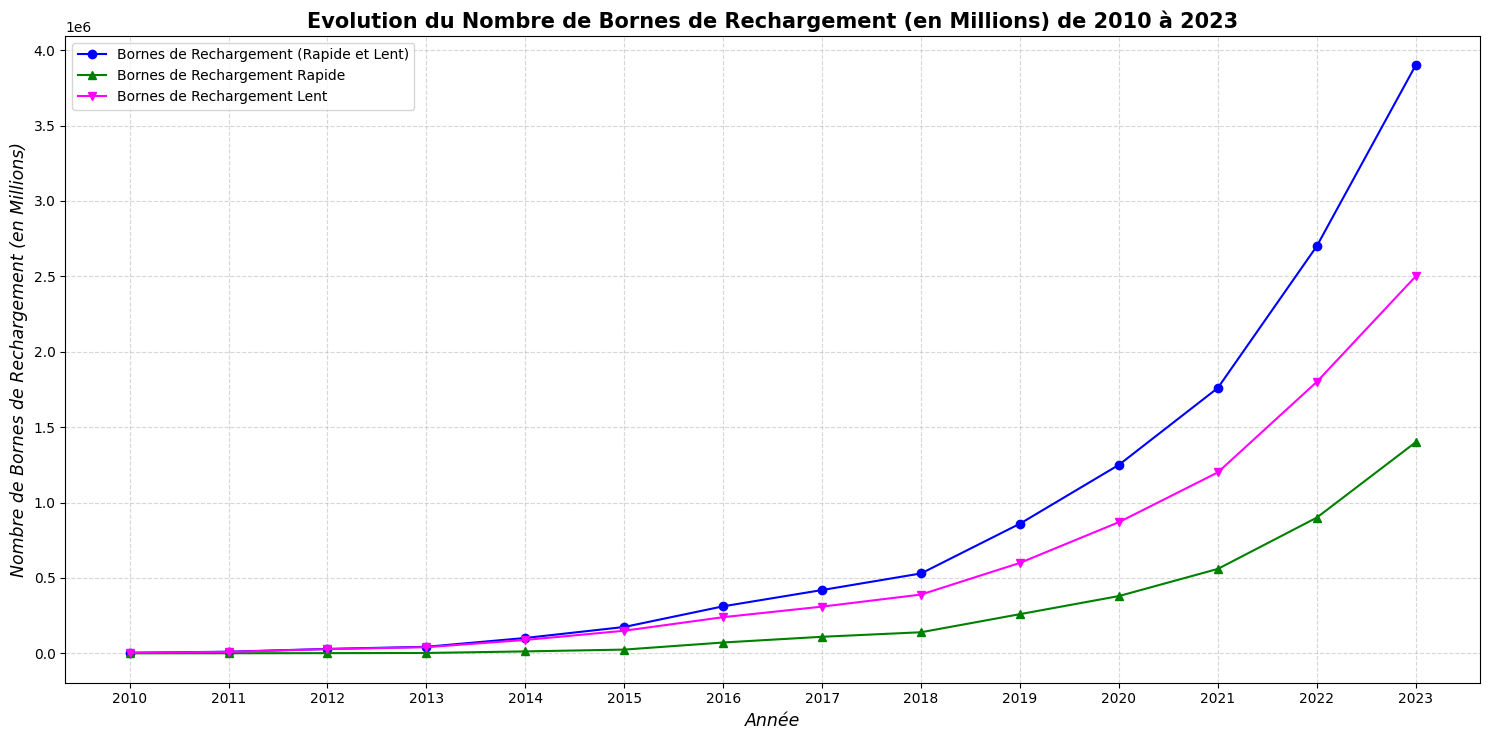

In [26]:
# Dimensionner une figure visualisant l'évolution du nombre de bornes de rechargement de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customiser les lineplots
plt.plot(years_for_charging_points, 
         all_charging_points,
         label = "Bornes de Rechargement (Rapide et Lent)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_charging_points,
         fast_charging_points, 
         label = "Bornes de Rechargement Rapide",
         color = "green", 
         marker = "^")
plt.plot(years_for_charging_points, 
         slow_charging_points, 
         label = "Bornes de Rechargement Lent", 
         color = "magenta", 
         marker = "v")
plt.legend(loc = "upper left")
plt.xticks(years_for_charging_points)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Nombre de Bornes de Rechargement (en Millions)", fontsize = 12.5, fontstyle = "italic")
plt.title("Evolution du Nombre de Bornes de Rechargement (en Millions) de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

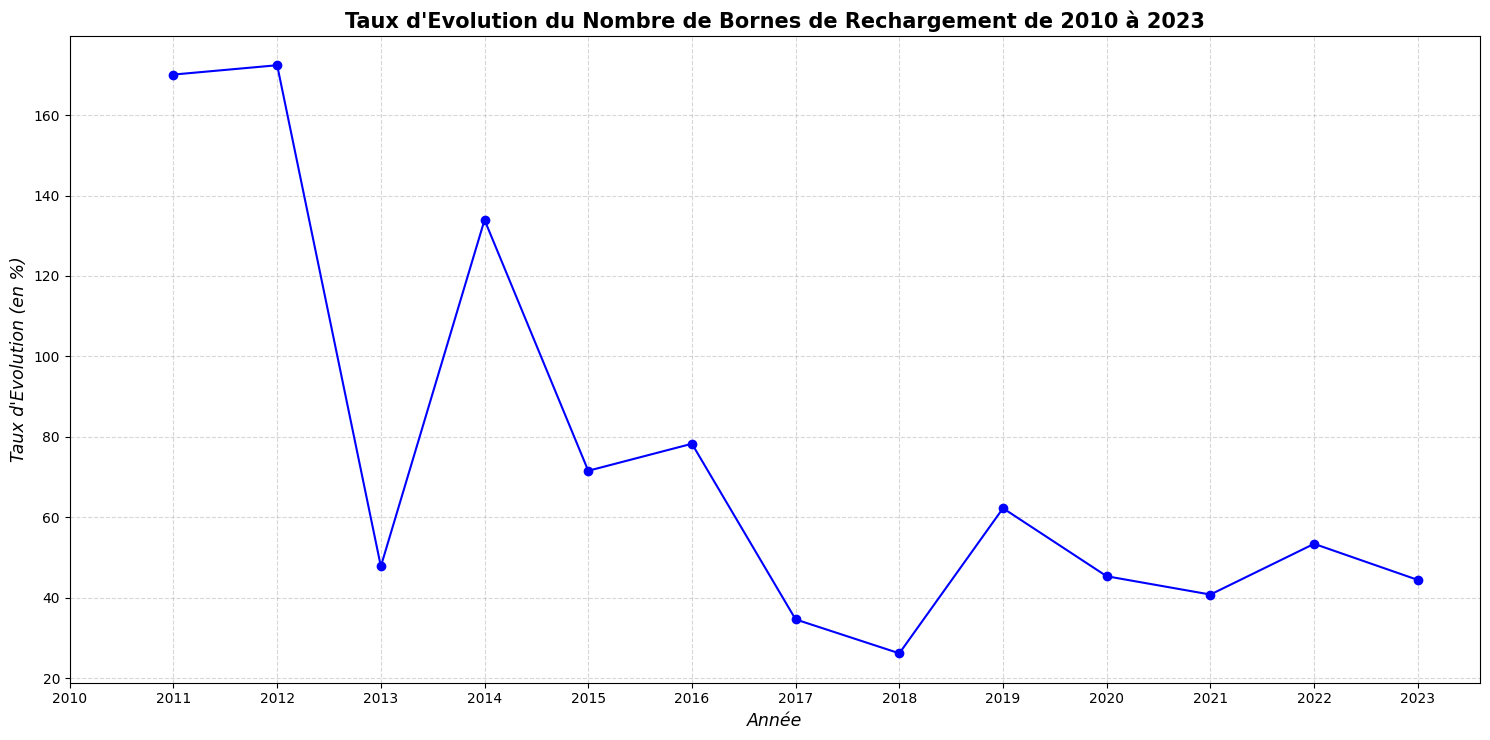

In [27]:
# Dimensionner une figure visualisant les taux d'évolution du nombre de bornes de rechargement de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_charging_points, 
         evolution_rate_for_charging_points, 
         color = "blue",
         marker = "o")
plt.xticks(years_for_charging_points)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Taux d'Evolution (en %)", fontsize = 12.5, fontstyle = "italic")
plt.title("Taux d'Evolution du Nombre de Bornes de Rechargement de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

#### Concernant les Voitures

In [28]:
# Stocker les années et les ventes de voitures dans des variables
years_for_cars = [key[1] for key in cars_kpis.keys()]

# Stocker le nombre de ventes par année dans des variables
sales_count_for_all_cars = [cars_kpis[("Cars", year)]["total_sales_count"] for year in years_for_cars]
sales_count_for_BEV_cars = [cars_kpis[("Cars", year)]["BEV_sales_count"] for year in years_for_cars]
sales_count_for_PHEV_cars = [cars_kpis[("Cars", year)]["PHEV_sales_count"] for year in years_for_cars]
sales_count_for_FCEV_cars = [cars_kpis[("Cars", year)]["FCEV_sales_count"] for year in years_for_cars]
evolution_rate_for_all_cars = [cars_kpis[("Cars", year)]["evolution_rate_total"] for year in years_for_cars]
evolution_rate_for_BEV_cars = [cars_kpis[("Cars", year)]["evolution_rate_BEV"] for year in years_for_cars]
evolution_rate_for_PHEV_cars = [cars_kpis[("Cars", year)]["evolution_rate_PHEV"] for year in years_for_cars]
evolution_rate_for_FCEV_cars = [cars_kpis[("Cars", year)]["evolution_rate_FCEV"] for year in years_for_cars]

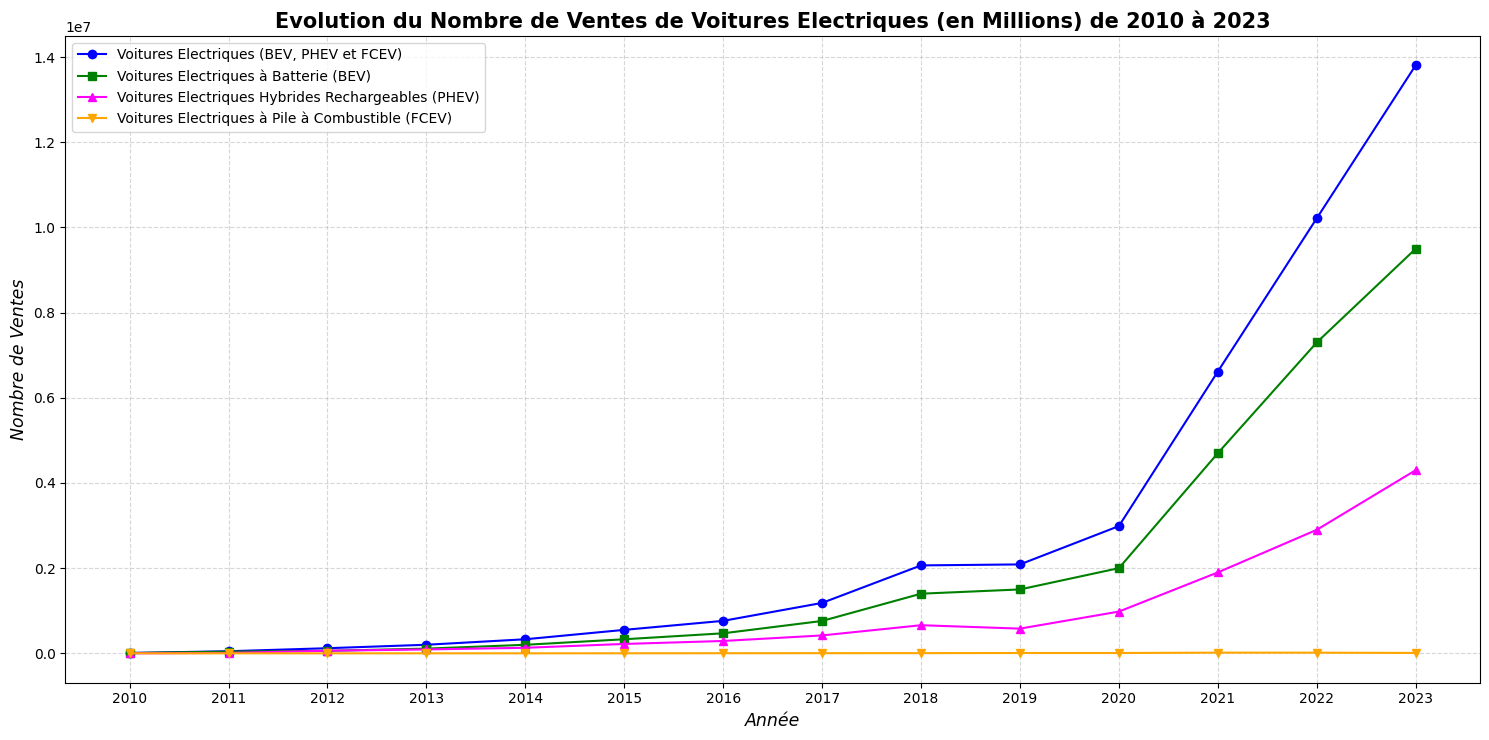

In [29]:
# Dimensionner une figure visualisant l'évolution du nombre de ventes de voitures électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_cars, 
         sales_count_for_all_cars,
         label = "Voitures Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_cars,
         sales_count_for_BEV_cars, 
         label = "Voitures Electriques à Batterie (BEV)",
         color = "green", 
         marker = "s")
plt.plot(years_for_cars, 
         sales_count_for_PHEV_cars, 
         label = "Voitures Electriques Hybrides Rechargeables (PHEV)", 
         color = "magenta", 
         marker = "^")
plt.plot(years_for_cars,
         sales_count_for_FCEV_cars, 
         label = "Voitures Electriques à Pile à Combustible (FCEV)",
         color = "orange", 
         marker = "v")
plt.legend(loc = "upper left")
plt.xticks(years_for_cars)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Nombre de Ventes", fontsize = 12.5, fontstyle = "italic")
plt.title("Evolution du Nombre de Ventes de Voitures Electriques (en Millions) de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

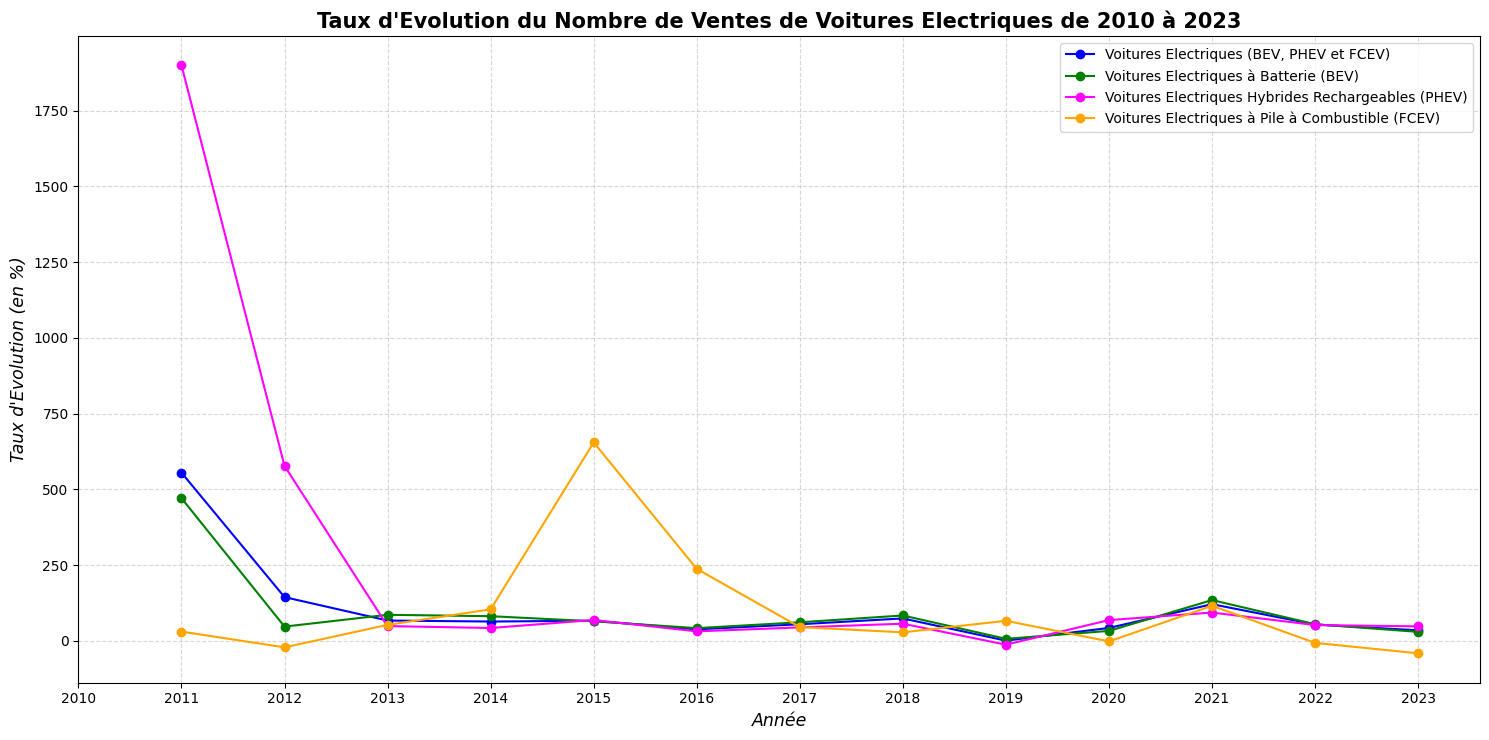

In [30]:
# Dimensionner une figure visualisant les taux d'évolution du nombre de ventes de voitures électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_cars, 
         evolution_rate_for_all_cars, 
         label = "Voitures Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_cars,
         evolution_rate_for_BEV_cars,
         label = "Voitures Electriques à Batterie (BEV)",
         color = "green",
         marker = "o")
plt.plot(years_for_cars,
         evolution_rate_for_PHEV_cars, 
         label = "Voitures Electriques Hybrides Rechargeables (PHEV)", 
         color = "magenta",
         marker = "o")
plt.plot(years_for_cars, 
         evolution_rate_for_FCEV_cars, 
         label = "Voitures Electriques à Pile à Combustible (FCEV)",
         color = "orange",
         marker = "o")
plt.legend(loc = "upper right")
plt.xticks(years_for_cars)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Taux d'Evolution (en %)", fontsize = 12.5, fontstyle = "italic")
plt.title("Taux d'Evolution du Nombre de Ventes de Voitures Electriques de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

#### Concernant les Bus

In [31]:
# Stocker les années et les ventes de bus dans des variables
years_for_buses = [key[1] for key in buses_kpis.keys()]

# Stocker le nombre de ventes par année dans des variables
sales_count_for_all_buses = [buses_kpis[("Buses", year)]["total_sales_count"] for year in years_for_buses]
sales_count_for_BEV_buses = [buses_kpis[("Buses", year)]["BEV_sales_count"] for year in years_for_buses]
sales_count_for_PHEV_buses = [buses_kpis[("Buses", year)]["PHEV_sales_count"] for year in years_for_buses]
sales_count_for_FCEV_buses = [buses_kpis[("Buses", year)]["FCEV_sales_count"] for year in years_for_buses]
evolution_rate_for_all_buses = [buses_kpis[("Buses", year)]["evolution_rate_total"] for year in years_for_buses]
evolution_rate_for_BEV_buses = [buses_kpis[("Buses", year)]["evolution_rate_BEV"] for year in years_for_buses]
evolution_rate_for_PHEV_buses = [buses_kpis[("Buses", year)]["evolution_rate_PHEV"] for year in years_for_buses]
evolution_rate_for_FCEV_buses = [buses_kpis[("Buses", year)]["evolution_rate_FCEV"] for year in years_for_buses]

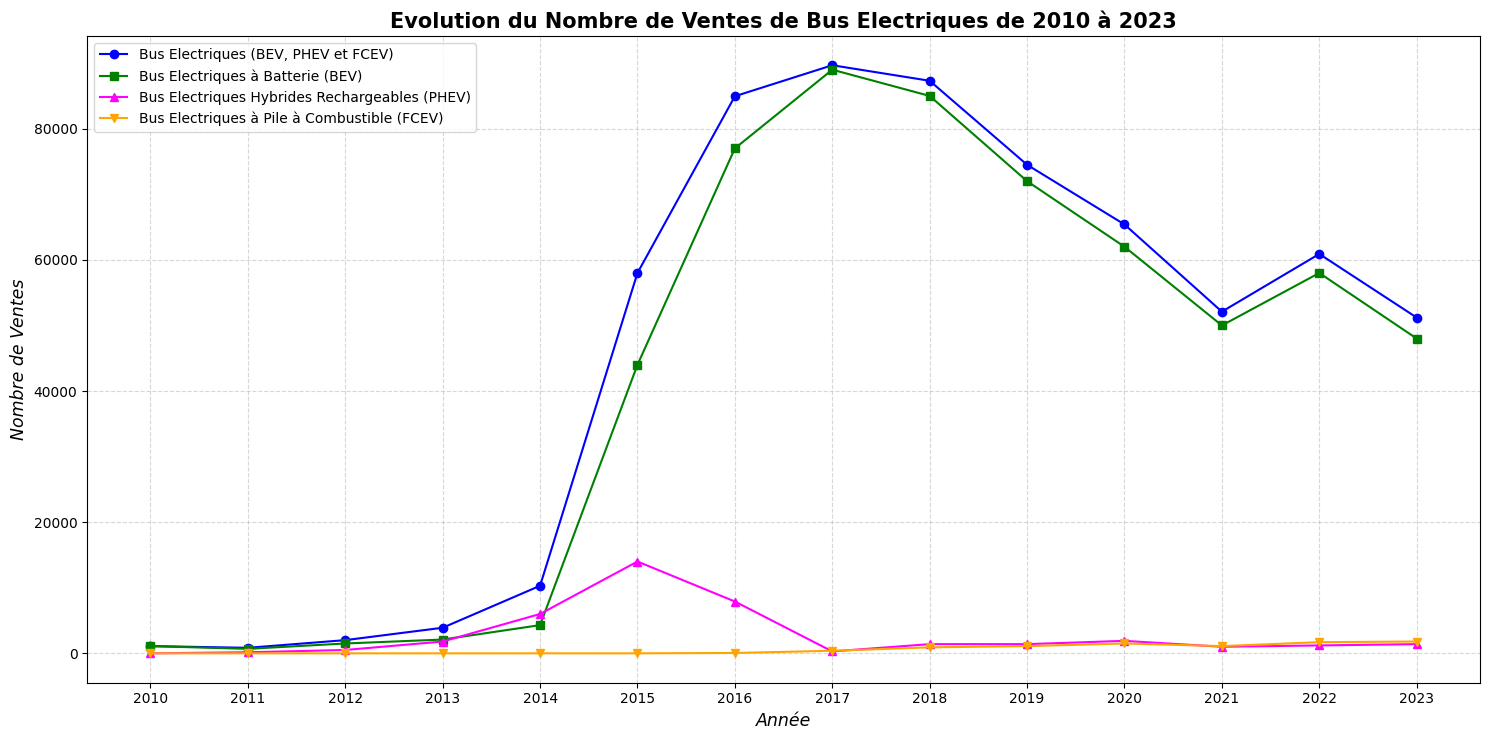

In [32]:
# Dimensionner une figure visualisant l'évolution du nombre de ventes de bus électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_buses, 
         sales_count_for_all_buses,
         label = "Bus Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_buses,
         sales_count_for_BEV_buses, 
         label = "Bus Electriques à Batterie (BEV)",
         color = "green", 
         marker = "s")
plt.plot(years_for_buses, 
         sales_count_for_PHEV_buses, 
         label = "Bus Electriques Hybrides Rechargeables (PHEV)", 
         color = "magenta", 
         marker = "^")
plt.plot(years_for_buses,
         sales_count_for_FCEV_buses, 
         label = "Bus Electriques à Pile à Combustible (FCEV)",
         color = "orange", 
         marker = "v")
plt.legend(loc = "upper left")
plt.xticks(years_for_buses)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Nombre de Ventes", fontsize = 12.5, fontstyle = "italic")
plt.title("Evolution du Nombre de Ventes de Bus Electriques de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

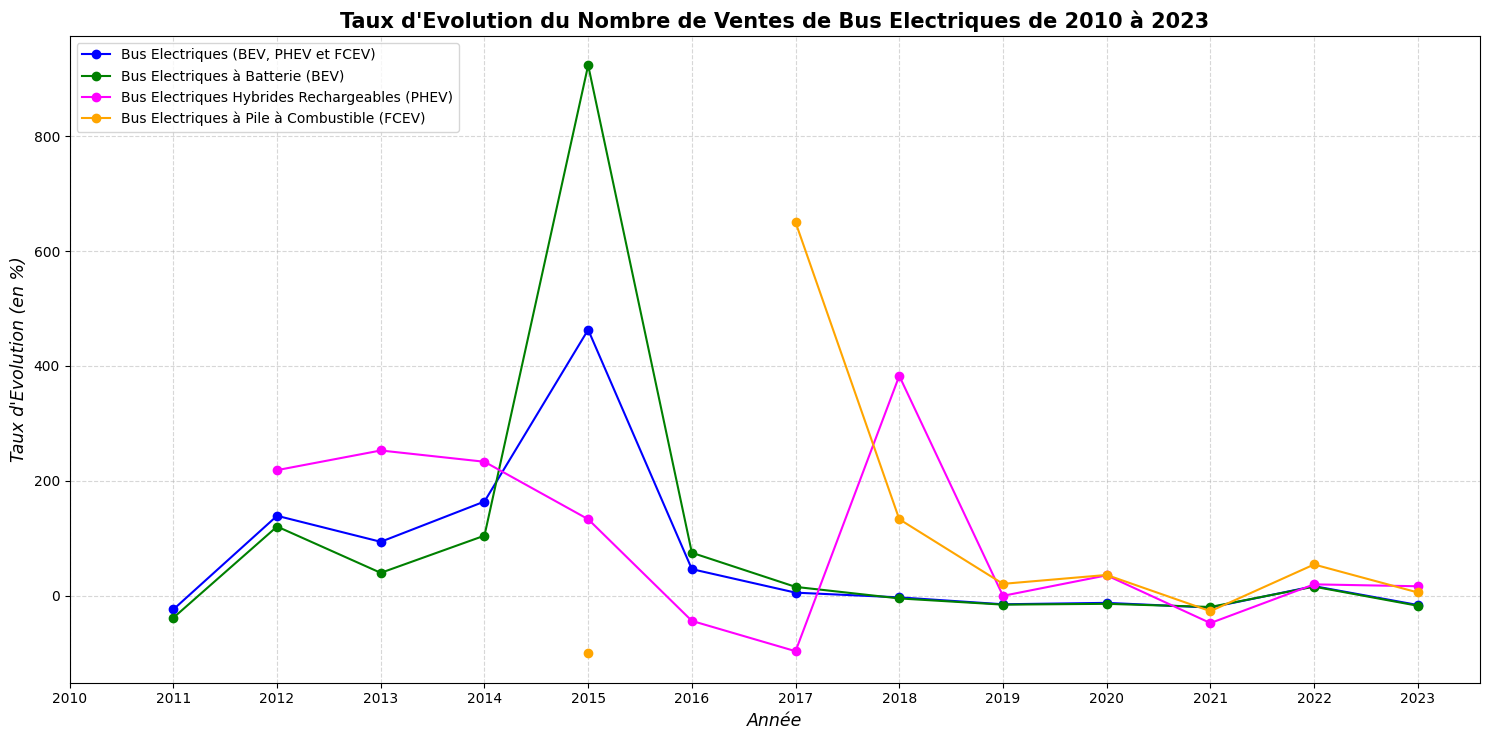

In [33]:
# Dimensionner une figure visualisant les taux d'évolution du nombre de ventes de bus électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_buses, 
         evolution_rate_for_all_buses, 
         label = "Bus Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_buses,
         evolution_rate_for_BEV_buses,
         label = "Bus Electriques à Batterie (BEV)",
         color = "green",
         marker = "o")
plt.plot(years_for_buses,
         evolution_rate_for_PHEV_buses, 
         label = "Bus Electriques Hybrides Rechargeables (PHEV)", 
         color = "magenta",
         marker = "o")
plt.plot(years_for_buses, 
         evolution_rate_for_FCEV_buses, 
         label = "Bus Electriques à Pile à Combustible (FCEV)",
         color = "orange",
         marker = "o")
plt.legend(loc = "upper left")
plt.xticks(years_for_buses)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Taux d'Evolution (en %)", fontsize = 12.5, fontstyle = "italic")
plt.title("Taux d'Evolution du Nombre de Ventes de Bus Electriques de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

#### Concernant les Camions

In [34]:
# Stocker les années et les ventes de camions dans des variables
years_for_trucks = [key[1] for key in trucks_kpis.keys()]

# Stocker le nombre de ventes par année dans des variables
sales_count_for_all_trucks = [trucks_kpis[("Trucks", year)]["total_sales_count"] for year in years_for_trucks]
sales_count_for_BEV_trucks = [trucks_kpis[("Trucks", year)]["BEV_sales_count"] for year in years_for_trucks]
sales_count_for_PHEV_trucks = [trucks_kpis[("Trucks", year)]["PHEV_sales_count"] for year in years_for_trucks]
sales_count_for_FCEV_trucks = [trucks_kpis[("Trucks", year)]["FCEV_sales_count"] for year in years_for_trucks]
evolution_rate_for_all_trucks = [trucks_kpis[("Trucks", year)]["evolution_rate_total"] for year in years_for_trucks]
evolution_rate_for_BEV_trucks = [trucks_kpis[("Trucks", year)]["evolution_rate_BEV"] for year in years_for_trucks]
evolution_rate_for_PHEV_trucks = [trucks_kpis[("Trucks", year)]["evolution_rate_PHEV"] for year in years_for_trucks]
evolution_rate_for_FCEV_trucks = [trucks_kpis[("Trucks", year)]["evolution_rate_FCEV"] for year in years_for_trucks]

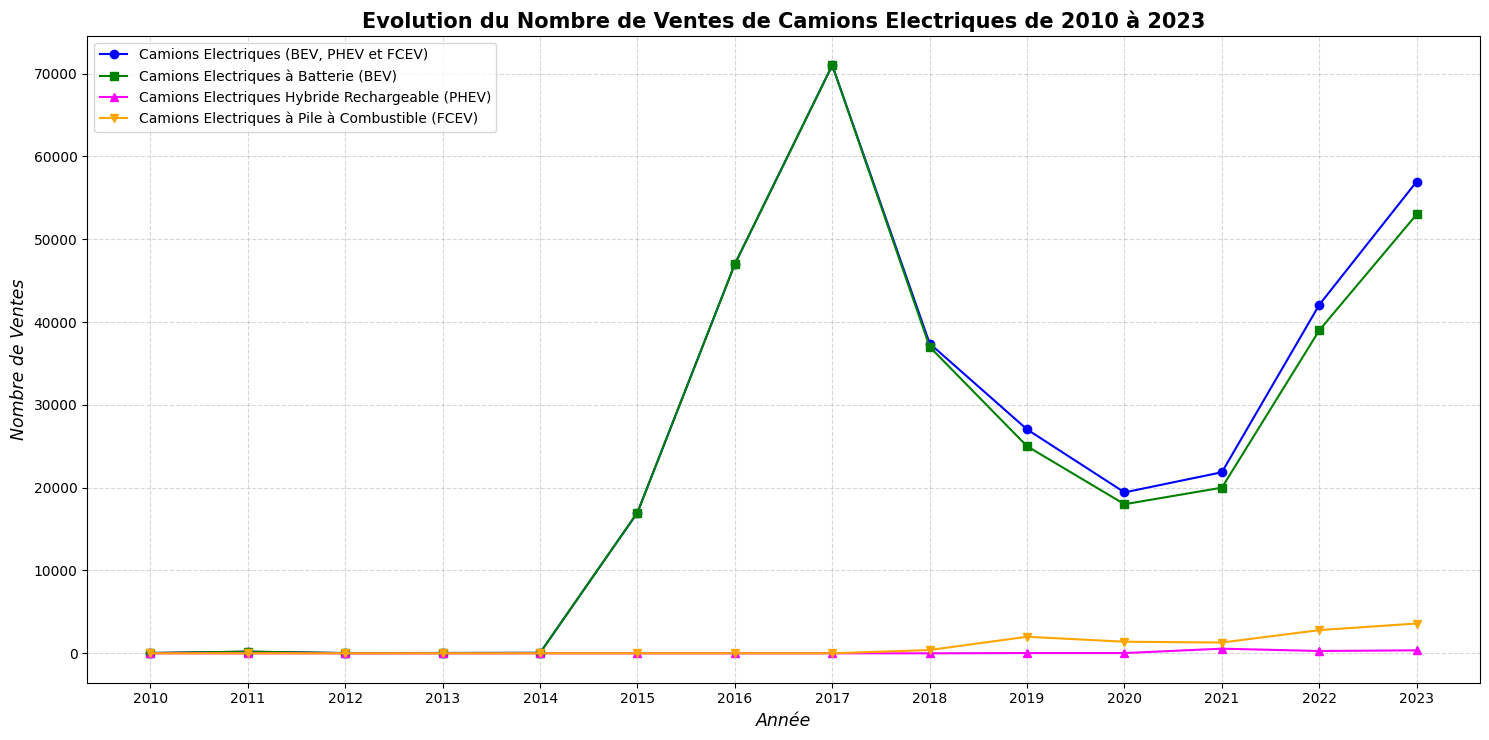

In [35]:
# Dimensionner une figure visualisant l'évolution du nombre de ventes de camions électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_trucks, 
         sales_count_for_all_trucks,
         label = "Camions Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_trucks,
         sales_count_for_BEV_trucks, 
         label = "Camions Electriques à Batterie (BEV)",
         color = "green", 
         marker = "s")
plt.plot(years_for_trucks, 
         sales_count_for_PHEV_trucks, 
         label = "Camions Electriques Hybride Rechargeable (PHEV)", 
         color = "magenta", 
         marker = "^")
plt.plot(years_for_trucks,
         sales_count_for_FCEV_trucks, 
         label = "Camions Electriques à Pile à Combustible (FCEV)",
         color = "orange", 
         marker = "v")
plt.legend(loc = "upper left")
plt.xticks(years_for_trucks)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Nombre de Ventes", fontsize = 12.5, fontstyle = "italic")
plt.title("Evolution du Nombre de Ventes de Camions Electriques de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

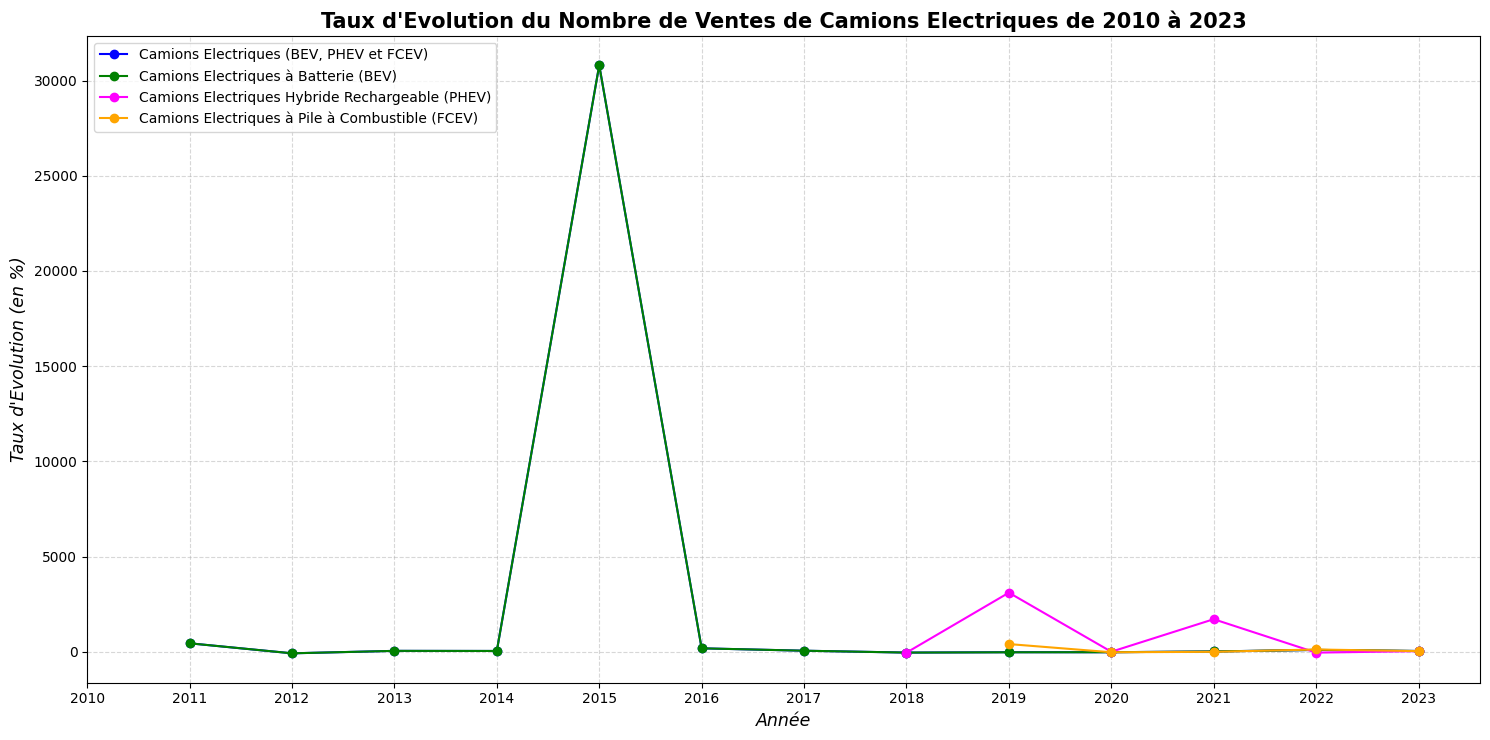

In [36]:
# Dimensionner une figure visualisant les taux d'évolution du nombre de ventes de camions électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_trucks, 
         evolution_rate_for_all_trucks, 
         label = "Camions Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_trucks,
         evolution_rate_for_BEV_trucks,
         label = "Camions Electriques à Batterie (BEV)",
         color = "green",
         marker = "o")
plt.plot(years_for_trucks,
         evolution_rate_for_PHEV_trucks, 
         label = "Camions Electriques Hybride Rechargeable (PHEV)", 
         color = "magenta",
         marker = "o")
plt.plot(years_for_trucks, 
         evolution_rate_for_FCEV_trucks, 
         label = "Camions Electriques à Pile à Combustible (FCEV)",
         color = "orange",
         marker = "o")
plt.legend(loc = "upper left")
plt.xticks(years_for_trucks)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Taux d'Evolution (en %)", fontsize = 12.5, fontstyle = "italic")
plt.title("Taux d'Evolution du Nombre de Ventes de Camions Electriques de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

#### Concernant les Utilitaires

In [37]:
# Stocker les années et les ventes d'utilitaires dans des variables
years_for_vans = [key[1] for key in vans_kpis.keys()]

# Stocker le nombre de ventes par année dans des variables
sales_count_for_all_vans = [vans_kpis[("Vans", year)]["total_sales_count"] for year in years_for_vans]
sales_count_for_BEV_vans = [vans_kpis[("Vans", year)]["BEV_sales_count"] for year in years_for_vans]
sales_count_for_PHEV_vans = [vans_kpis[("Vans", year)]["PHEV_sales_count"] for year in years_for_vans]
sales_count_for_FCEV_vans = [vans_kpis[("Vans", year)]["FCEV_sales_count"] for year in years_for_vans]
evolution_rate_for_all_vans = [vans_kpis[("Vans", year)]["evolution_rate_total"] for year in years_for_vans]
evolution_rate_for_BEV_vans = [vans_kpis[("Vans", year)]["evolution_rate_BEV"] for year in years_for_vans]
evolution_rate_for_PHEV_vans = [vans_kpis[("Vans", year)]["evolution_rate_PHEV"] for year in years_for_vans]
evolution_rate_for_FCEV_vans = [vans_kpis[("Vans", year)]["evolution_rate_FCEV"] for year in years_for_vans]

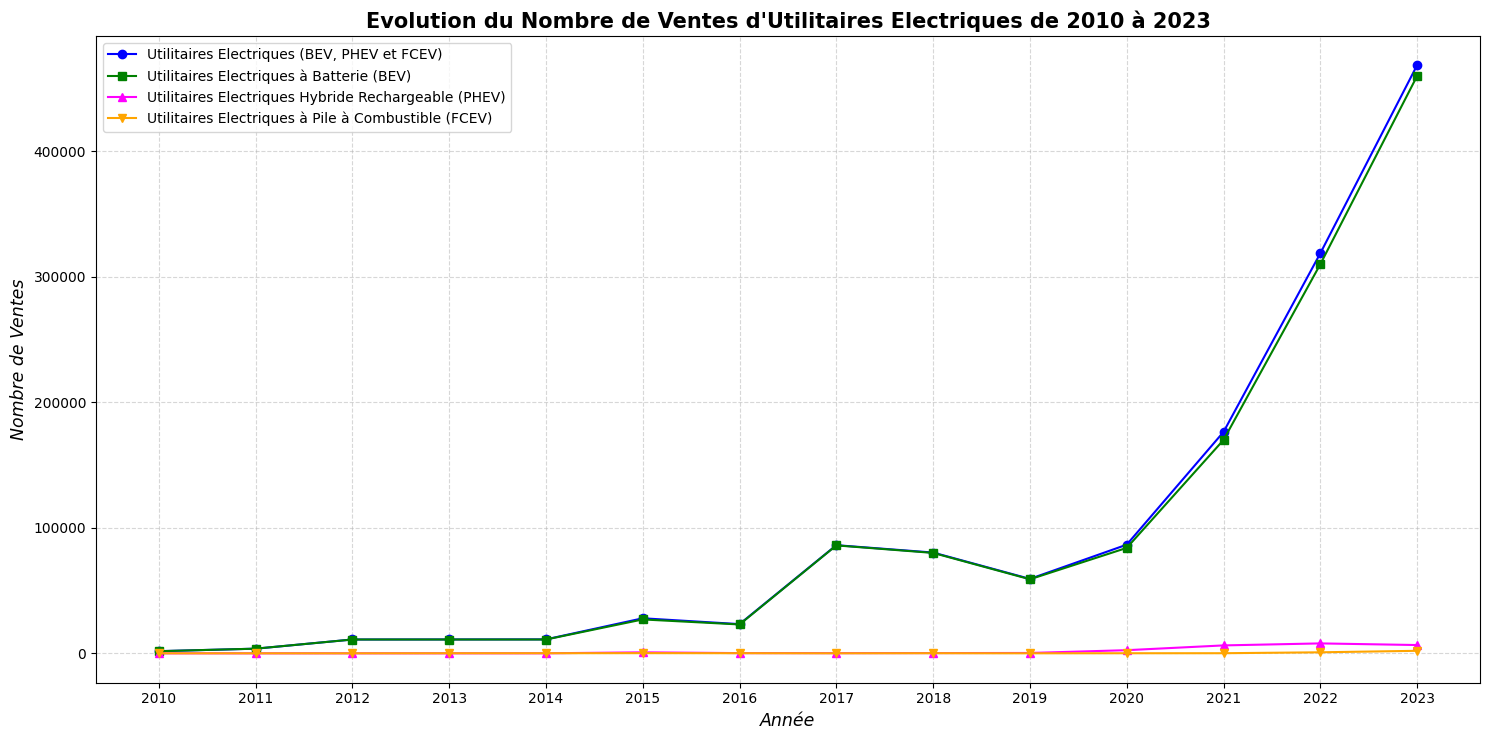

In [38]:
# Dimensionner une figure visualisant l'évolution du nombre de ventes d'utilitaires électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_vans, 
         sales_count_for_all_vans,
         label = "Utilitaires Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_vans,
         sales_count_for_BEV_vans, 
         label = "Utilitaires Electriques à Batterie (BEV)",
         color = "green", 
         marker = "s")
plt.plot(years_for_vans, 
         sales_count_for_PHEV_vans, 
         label = "Utilitaires Electriques Hybride Rechargeable (PHEV)", 
         color = "magenta", 
         marker = "^")
plt.plot(years_for_vans,
         sales_count_for_FCEV_vans, 
         label = "Utilitaires Electriques à Pile à Combustible (FCEV)",
         color = "orange", 
         marker = "v")
plt.legend(loc = "upper left")
plt.xticks(years_for_vans)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Nombre de Ventes", fontsize = 12.5, fontstyle = "italic")
plt.title("Evolution du Nombre de Ventes d'Utilitaires Electriques de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

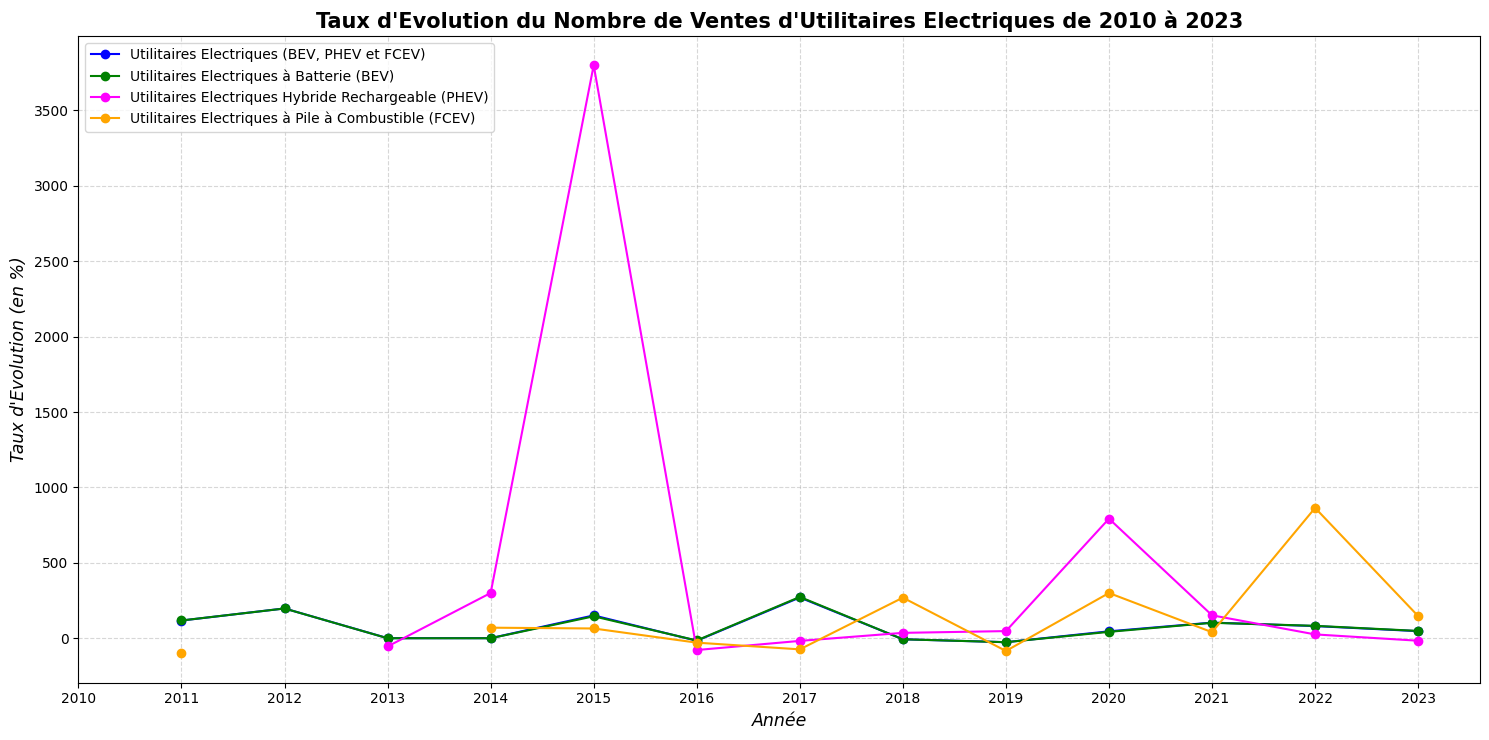

In [39]:
# Dimensionner une figure visualisant les taux d'évolution du nombre de ventes d'utilitaires électriques de 2010 à 2023
plt.figure(figsize = (15, 7.5))

# Créer et customizer les lineplots
plt.plot(years_for_vans, 
         evolution_rate_for_all_vans, 
         label = "Utilitaires Electriques (BEV, PHEV et FCEV)", 
         color = "blue", 
         marker = "o")
plt.plot(years_for_vans,
         evolution_rate_for_BEV_vans,
         label = "Utilitaires Electriques à Batterie (BEV)",
         color = "green",
         marker = "o")
plt.plot(years_for_vans,
         evolution_rate_for_PHEV_vans, 
         label = "Utilitaires Electriques Hybride Rechargeable (PHEV)", 
         color = "magenta",
         marker = "o")
plt.plot(years_for_vans, 
         evolution_rate_for_FCEV_vans, 
         label = "Utilitaires Electriques à Pile à Combustible (FCEV)",
         color = "orange",
         marker = "o")
plt.legend(loc = "upper left")
plt.xticks(years_for_vans)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel("Année", fontsize = 12.5, fontstyle = "italic")
plt.ylabel("Taux d'Evolution (en %)", fontsize = 12.5, fontstyle = "italic")
plt.title("Taux d'Evolution du Nombre de Ventes d'Utilitaires Electriques de 2010 à 2023", fontsize = 15, fontweight = "bold")

# Afficher la figure
plt.tight_layout()
plt.show()

## Prédire les KPIs

### A l'échelle mondiale

#### Concernant les Voitures

In [40]:
# Convertir en arrays et Stocker dans des variables 
# les années et les nombres de ventes de voitures électriques
years_for_cars_array = np.array(years_for_cars).reshape(-1, 1)
sales_count_for_all_cars_array = np.array(sales_count_for_all_cars)
sales_count_for_BEV_cars_array = np.array(sales_count_for_BEV_cars)
sales_count_for_PHEV_cars_array = np.array(sales_count_for_PHEV_cars)
sales_count_for_FCEV_cars_array = np.array(sales_count_for_FCEV_cars)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de voitures électriques en 2024
sales_count_prediction_for_all_cars_dict = train_and_predict(
    years_for_cars_array, sales_count_for_all_cars_array, "total"
)
sales_count_prediction_for_all_cars = int(
    sales_count_prediction_for_all_cars_dict["total"]
)
print(
    f"Nombre estimé de ventes de Voitures Electriques (BEV, PHEV et FCEV) en 2024 : "
    f"{sales_count_prediction_for_all_cars}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de voitures électriques à Batterie (BEV) en 2024
sales_count_prediction_for_BEV_cars_dict = train_and_predict(
    years_for_cars_array, sales_count_for_BEV_cars_array, "BEV"
)
sales_count_prediction_for_BEV_cars = int(
    sales_count_prediction_for_BEV_cars_dict["BEV"]
)
print(
    f"Nombre estimé de ventes de Voitures Electriques à Batterie (BEV) en 2024 : "
    f"{sales_count_prediction_for_BEV_cars}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de voitures électriques Hybrides Rechargeables (PHEV) en 2024
sales_count_prediction_for_PHEV_cars_dict = train_and_predict(
    years_for_cars_array, sales_count_for_PHEV_cars_array, "PHEV"
)
sales_count_prediction_for_PHEV_cars = int(
    sales_count_prediction_for_PHEV_cars_dict["PHEV"]
)
print(
    f"Nombre estimé de ventes de Voitures Electriques Hybrides Rechargeables (PHEV) en 2024 : "
    f"{sales_count_prediction_for_PHEV_cars}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de voitures électriques à Pile à Combustible (FCEV) en 2024
sales_count_prediction_for_FCEV_cars_dict = train_and_predict(
    years_for_cars_array, sales_count_for_FCEV_cars_array, "FCEV"
)
sales_count_prediction_for_FCEV_cars = int(
    sales_count_prediction_for_FCEV_cars_dict["FCEV"]
)
print(
    f"Nombre estimé de ventes de Voitures Electriques à Pile à Combustible (FCEV) en 2024 : "
    f"{sales_count_prediction_for_FCEV_cars}"
)

Nombre estimé de ventes de Voitures Electriques (BEV, PHEV et FCEV) en 2024 : 15080470
Nombre estimé de ventes de Voitures Electriques à Batterie (BEV) en 2024 : 10564763
Nombre estimé de ventes de Voitures Electriques Hybrides Rechargeables (PHEV) en 2024 : 4499123
Nombre estimé de ventes de Voitures Electriques à Pile à Combustible (FCEV) en 2024 : 16582


#### Concernant les Bus

In [41]:
# Convertir en arrays et Stocker dans des variables 
# les années et les nombres de ventes de bus électriques
years_for_buses_array = np.array(years_for_buses).reshape(-1, 1)
sales_count_for_all_buses_array = np.array(sales_count_for_all_buses)
sales_count_for_BEV_buses_array = np.array(sales_count_for_BEV_buses)
sales_count_for_PHEV_buses_array = np.array(sales_count_for_PHEV_buses)
sales_count_for_FCEV_buses_array = np.array(sales_count_for_FCEV_buses)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de bus électriques en 2024
sales_count_prediction_for_all_buses_dict = train_and_predict(
    years_for_buses_array, sales_count_for_all_buses_array, "total"
)
sales_count_prediction_for_all_buses = int(
    sales_count_prediction_for_all_buses_dict["total"]
)
print(
    f"Nombre estimé de ventes de Bus Electriques (BEV, PHEV et FCEV) en 2024 : "
    f"{sales_count_prediction_for_all_buses}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de bus électriques à Batterie (BEV) en 2024
sales_count_prediction_for_BEV_buses_dict = train_and_predict(
    years_for_buses_array, sales_count_for_BEV_buses_array, "BEV"
)
sales_count_prediction_for_BEV_buses = int(
    sales_count_prediction_for_BEV_buses_dict["BEV"]
)
print(
    f"Nombre estimé de ventes de Bus Electriques à Batterie (BEV) en 2024 : "
    f"{sales_count_prediction_for_BEV_buses}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de bus électriques Hybrides Rechargeables (PHEV) en 2024
sales_count_prediction_for_PHEV_buses_dict = train_and_predict(
    years_for_buses_array, sales_count_for_PHEV_buses_array, "PHEV"
)
sales_count_prediction_for_PHEV_buses = int(
    sales_count_prediction_for_PHEV_buses_dict["PHEV"]
)
print(
    f"Nombre estimé de ventes de Bus Electriques Hybrides Rechargeables (PHEV) en 2024 : "
    f"{sales_count_prediction_for_PHEV_buses}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de bus électriques à Pile à Combustible (FCEV) en 2024
sales_count_prediction_for_FCEV_buses_dict = train_and_predict(
    years_for_buses_array, sales_count_for_FCEV_buses_array, "FCEV"
)
sales_count_prediction_for_FCEV_buses = int(
    sales_count_prediction_for_FCEV_buses_dict["FCEV"]
)
print(
    f"Nombre estimé de ventes de Bus Electriques à Pile à Combustible (FCEV) en 2024 : "
    f"{sales_count_prediction_for_FCEV_buses}"
)

Nombre estimé de ventes de Bus Electriques (BEV, PHEV et FCEV) en 2024 : 40585
Nombre estimé de ventes de Bus Electriques à Batterie (BEV) en 2024 : 41187
Nombre estimé de ventes de Bus Electriques Hybrides Rechargeables (PHEV) en 2024 : -2908
Nombre estimé de ventes de Bus Electriques à Pile à Combustible (FCEV) en 2024 : 2306


#### Concernant les Camions

In [42]:
# Convertir en arrays et Stocker dans des variables 
# les années et les nombres de ventes de camions électriques
years_for_trucks_array = np.array(years_for_trucks).reshape(-1, 1)
sales_count_for_all_trucks_array = np.array(sales_count_for_all_trucks)
sales_count_for_BEV_trucks_array = np.array(sales_count_for_BEV_trucks)
sales_count_for_PHEV_trucks_array = np.array(sales_count_for_PHEV_trucks)
sales_count_for_FCEV_trucks_array = np.array(sales_count_for_FCEV_trucks)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de camions électriques en 2024
sales_count_prediction_for_all_trucks_dict = train_and_predict(
    years_for_trucks_array, sales_count_for_all_trucks_array, "total"
)
sales_count_prediction_for_all_trucks = int(
    sales_count_prediction_for_all_trucks_dict["total"]
)
print(
    f"Nombre estimé de ventes de Camions Electriques (BEV, PHEV et FCEV) en 2024 : "
    f"{sales_count_prediction_for_all_trucks}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de camions électriques à Batterie (BEV) en 2024
sales_count_prediction_for_BEV_trucks_dict = train_and_predict(
    years_for_trucks_array, sales_count_for_BEV_trucks_array, "BEV"
)
sales_count_prediction_for_BEV_trucks = int(
    sales_count_prediction_for_BEV_trucks_dict["BEV"]
)
print(
    f"Nombre estimé de ventes de Camions Electriques à Batterie (BEV) en 2024 : "
    f"{sales_count_prediction_for_BEV_trucks}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de camions électriques Hybrides Rechargeables (PHEV) en 2024
sales_count_prediction_for_PHEV_trucks_dict = train_and_predict(
    years_for_trucks_array, sales_count_for_PHEV_trucks_array, "PHEV"
)
sales_count_prediction_for_PHEV_trucks = int(
    sales_count_prediction_for_PHEV_trucks_dict["PHEV"]
)
print(
    f"Nombre estimé de ventes de Camions Electriques Hybrides Rechargeables (PHEV) en 2024 : "
    f"{sales_count_prediction_for_PHEV_trucks}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes de camions électriques à Pile à Combustible (FCEV) en 2024
sales_count_prediction_for_FCEV_trucks_dict = train_and_predict(
    years_for_trucks_array, sales_count_for_FCEV_trucks_array, "FCEV"
)
sales_count_prediction_for_FCEV_trucks = int(
    sales_count_prediction_for_FCEV_trucks_dict["FCEV"]
)
print(
    f"Nombre estimé de ventes de Camions Electriques à Pile à Combustible (FCEV) en 2024 : "
    f"{sales_count_prediction_for_FCEV_trucks}"
)

Nombre estimé de ventes de Camions Electriques (BEV, PHEV et FCEV) en 2024 : 41692
Nombre estimé de ventes de Camions Electriques à Batterie (BEV) en 2024 : 37072
Nombre estimé de ventes de Camions Electriques Hybrides Rechargeables (PHEV) en 2024 : 514
Nombre estimé de ventes de Camions Electriques à Pile à Combustible (FCEV) en 2024 : 4106


#### Concernant les Utilitaires

In [43]:
# Convertir en arrays et Stocker dans des variables 
# les années et les nombres de ventes d'utilitaires électriques
years_for_vans_array = np.array(years_for_vans).reshape(-1, 1)
sales_count_for_all_vans_array = np.array(sales_count_for_all_vans)
sales_count_for_BEV_vans_array = np.array(sales_count_for_BEV_vans)
sales_count_for_PHEV_vans_array = np.array(sales_count_for_PHEV_vans)
sales_count_for_FCEV_vans_array = np.array(sales_count_for_FCEV_vans)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes d'utilitaires électriques en 2024
sales_count_prediction_for_all_vans_dict = train_and_predict(
    years_for_vans_array, sales_count_for_all_vans_array, "total"
)
sales_count_prediction_for_all_vans = int(
    sales_count_prediction_for_all_vans_dict["total"]
)
print(
    f"Nombre estimé de ventes d'Utilitaires Electriques (BEV, PHEV et FCEV) en 2024 : "
    f"{sales_count_prediction_for_all_vans}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes d'utilitaires électriques à Batterie (BEV) en 2024
sales_count_prediction_for_BEV_vans_dict = train_and_predict(
    years_for_vans_array, sales_count_for_BEV_vans_array, "BEV"
)
sales_count_prediction_for_BEV_vans = int(
    sales_count_prediction_for_BEV_vans_dict["BEV"]
)
print(
    f"Nombre estimé de ventes d'Utilitaires Electriques à Batterie (BEV) en 2024 : "
    f"{sales_count_prediction_for_BEV_vans}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes d'utilitaires électriques Hybrides Rechargeables (PHEV) en 2024
sales_count_prediction_for_PHEV_vans_dict = train_and_predict(
    years_for_vans_array, sales_count_for_PHEV_vans_array, "PHEV"
)
sales_count_prediction_for_PHEV_vans = int(
    sales_count_prediction_for_PHEV_vans_dict["PHEV"]
)
print(
    f"Nombre estimé de ventes d'Utilitaires Electriques Hybrides Rechargeables (PHEV) en 2024 : "
    f"{sales_count_prediction_for_PHEV_vans}"
)

# Appeler la fonction train_and_predict() pour 
# Entrainer un modèle de Regression Polynomiale de degrée 2 et
# Prédire les nombres de ventes d'utilitaires électriques à Pile à Combustible (FCEV) en 2024
sales_count_prediction_for_FCEV_vans_dict = train_and_predict(
    years_for_vans_array, sales_count_for_FCEV_vans_array, "FCEV"
)
sales_count_prediction_for_FCEV_vans = int(
    sales_count_prediction_for_FCEV_vans_dict["FCEV"]
)
print(
    f"Nombre estimé de ventes d'Utilitaires Electriques à Pile à Combustible (FCEV) en 2024 : "
    f"{sales_count_prediction_for_FCEV_vans}"
)

Nombre estimé de ventes d'Utilitaires Electriques (BEV, PHEV et FCEV) en 2024 : 475933
Nombre estimé de ventes d'Utilitaires Electriques à Batterie (BEV) en 2024 : 464696
Nombre estimé de ventes d'Utilitaires Electriques Hybrides Rechargeables (PHEV) en 2024 : 9627
Nombre estimé de ventes d'Utilitaires Electriques à Pile à Combustible (FCEV) en 2024 : 1609


## Résoudre la Problématique

L'application est disponible dans le dépôt GitHub.